In [12]:
# Packages that may need to be installed to run
#pip install opencv-python

In [6]:
import numpy as np 
import cv2
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt       
%matplotlib inline

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import SVR

In [10]:
# Data Cleaning
# Data source cite: https://github.com/gabrieldgf4/PlantVillage-Dataset
# Repost from the plantvillage.org repository that is no longer available

# Setting filters for the images hsv colors
low_hsv = (0,60,0)
high_hsv = (179,255,255)


#cleaning the images
def cleaning_image(images):
    clean_image = []
    for image in images:
        gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(gray_scale, low_hsv,high_hsv)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel=np.ones((8,8),dtype=np.uint8))
        clean_image.append(cv2.bitwise_and(image, image,mask=mask))
    return clean_image

# Getting healthy leaf images (#1000)
Toma_healthy = [cv2.imread(file) for file in glob.glob(r'TomatoDataset/Tomato_healthy/*.JPG')]
Toma_healthy_cleaned = cleaning_image(Toma_healthy)

# Getting moldy leaf images (# 952)
Toma_mold  = [cv2.imread(file) for file in glob.glob(r'TomatoDataset/Tomato_leaf_mold/*.JPG')]
Toma_mold_cleaned = cleaning_image(Toma_mold)

# Getting bacterial spot images (# 1000)
Toma_bact_spot  = [cv2.imread(file) for file in glob.glob(r'TomatoDataset/Tomato_bacterial_spot/*.JPG')]
Toma_bact_spot_clean = cleaning_image(Toma_bact_spot)

KeyboardInterrupt: 

In [5]:
# Image Checker
# cv2.imshow("Image", Toma_bact_spot_clean[88])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
# Feature gathering code
# Takes in image list and label, returns pandas datafram of features

def feature_gathering(images, label):
    red_mean = []
    blue_mean = []
    green_mean = []
    contrast = [] # not used yet. Need to download a package to get this feature
    labels = [label]*len(images)
    for image in images:
        red_mean.append(np.mean(image[:,:,0]))
        blue_mean.append(np.mean(image[:,:,1]))
        green_mean.append(np.mean(image[:,:,2]))
        
    return pd.DataFrame({"label":labels, "RedMean":red_mean, "BlueMean":blue_mean, "GreenMean": green_mean})

In [7]:
# uncleaned images
Toma_healthy_df = feature_gathering(Toma_healthy, 1)
Toma_mold_df = feature_gathering(Toma_mold, 2)
Toma_bact_spot_df = feature_gathering(Toma_bact_spot, 3)

uncleaned_leaves_df = pd.concat([Toma_healthy_df,Toma_mold_df,Toma_bact_spot_df], axis =0)
unclean_X = uncleaned_leaves_df.drop(columns= ["label"], axis = 1)
unclean_y = uncleaned_leaves_df["label"]

In [8]:
# cleaned images
Toma_healthy_df = feature_gathering(Toma_healthy_cleaned, 1)
Toma_mold_df  = feature_gathering(Toma_mold_cleaned, 2)
Toma_bact_spot_df = feature_gathering(Toma_bact_spot, 3)

cleaned_leaves_df = pd.concat([Toma_healthy_df,Toma_mold_df,Toma_bact_spot_df], axis =0)
clean_X = cleaned_leaves_df.drop(columns= ["label"], axis = 1)
clean_y = cleaned_leaves_df["label"]


In [9]:
# SVM Model Maker
Leaf_svm = SVC(kernel='rbf', C = 100,)

In [10]:
# Cross_val_score unclean
kf = KFold(n_splits= 10, shuffle = True)
scores = cross_val_score(Leaf_svm, unclean_X, unclean_y, cv=kf)
print("The unclean Cross Val score = ",np.average(np.absolute(scores)))

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=0.

In [11]:
# Cross_val_score clean
kf = KFold(n_splits= 10, shuffle = True)
scores = cross_val_score(Leaf_svm, clean_X, clean_y, cv=kf)
print("The clean Cross Val score = ",np.average(np.absolute(scores)))

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=0.

Combined sample data:
     RedMean   BlueMean  GreenMean   Severity
0  34.151932  46.851624  36.635574  65.814209
1  35.224976  48.073441  38.844437  64.135742
2  32.303375  48.487076  37.033432  60.842896
3  33.654617  49.406982  37.194321  61.468506
4  13.930298  18.262924  15.178345  87.225342
Predicted severity percentages:
[52.76365566 53.7898491  81.37299133 65.37451981 57.83757913 52.01786883
 69.87116006 60.5244785  60.96955692 63.16941513 52.03292804 41.76995855
 58.52900735 52.54547895 53.05999104 51.57175761 54.44786119 58.32634633
 45.71380192 64.35868579 53.48022624 71.61954727 69.74545102 54.32579398
  0.8603296  57.24222348 57.08733659 62.27063265 14.22671211 50.36949577
 60.78758854  3.89375129 49.1031139  33.90396469 37.80419832 79.71554261
 64.92878315 52.00703801 51.25564177 52.28863369 62.26795183 53.50848842
 48.50662807 61.26741856 58.96625955 51.57904077 58.03078894 49.27692202
 70.10731425 52.58915472 73.14553529  4.70094926 55.23514874 50.72922368
 53.44890041 

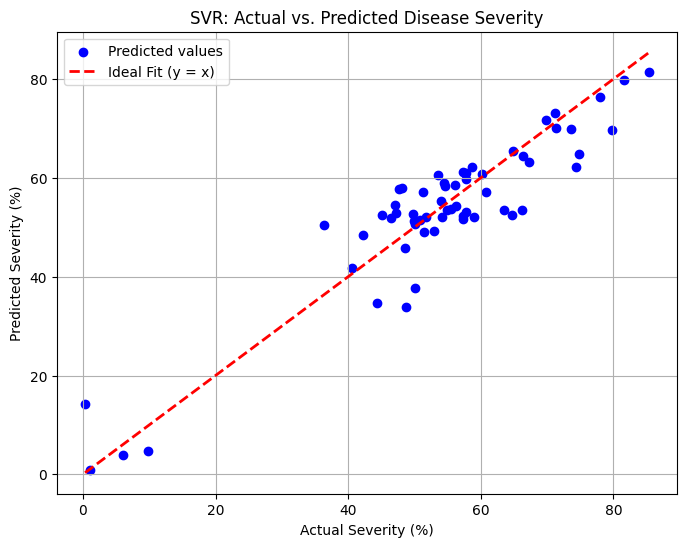

/var/folders/4z/tsgtydr902j3c1kwnldjp5r00000gn/T/ipykernel_56372/1814689801.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Healthy", "Mold", "Bacterial Spot"])


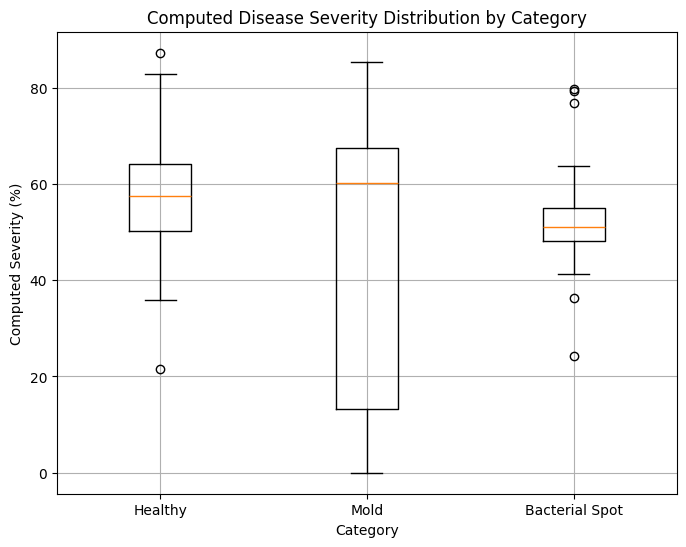

In [9]:
# the healthy HSV range.
low_hsv = (0, 60, 0)
high_hsv = (179, 255, 255)

def cleaning_image(images):
    cleaned_images = []
    for image in images:
        # Convert from BGR to HSV.
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Create a mask for pixels within the healthy range.
        mask = cv2.inRange(hsv_image, low_hsv, high_hsv)
        # Apply morphological closing to remove small holes.
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel=np.ones((8, 8), dtype=np.uint8))
        # Apply the mask to the original image.
        cleaned = cv2.bitwise_and(image, image, mask=mask)
        cleaned_images.append(cleaned)
    return cleaned_images

def compute_severity_from_clean(image):
    healthy_mask = np.any(image != 0, axis=2)
    healthy_pixels = np.count_nonzero(healthy_mask)
    total_pixels = image.shape[0] * image.shape[1]
    diseased_pixels = total_pixels - healthy_pixels
    severity_percentage = (diseased_pixels / total_pixels) * 100
    return severity_percentage


def feature_gathering(images):
    red_mean, blue_mean, green_mean = [], [], []
    for image in images:
        red_mean.append(np.mean(image[:, :, 0]))
        blue_mean.append(np.mean(image[:, :, 1]))
        green_mean.append(np.mean(image[:, :, 2]))
    return pd.DataFrame({
        "RedMean": red_mean,
        "BlueMean": blue_mean,
        "GreenMean": green_mean
    })


# 4.1 Healthy Leaves
healthy_files = glob.glob(r'TomatoDataset/Tomato_healthy/*.JPG')[:100]  # adjust number as needed
healthy_images = [cv2.imread(file) for file in healthy_files]
healthy_images_cleaned = cleaning_image(healthy_images)
healthy_severity = [compute_severity_from_clean(img) for img in healthy_images_cleaned]
healthy_df = feature_gathering(healthy_images_cleaned)
healthy_df["Severity"] = healthy_severity

# 4.2 Mold Leaves
mold_files = glob.glob(r'TomatoDataset/Tomato_leaf_mold/*.JPG')[:100]
mold_images = [cv2.imread(file) for file in mold_files]
mold_images_cleaned = cleaning_image(mold_images)
mold_severity = [compute_severity_from_clean(img) for img in mold_images_cleaned]
mold_df = feature_gathering(mold_images_cleaned)
mold_df["Severity"] = mold_severity

# 4.3 Bacterial Spot Leaves (Back_Spot)
bact_files = glob.glob(r'TomatoDataset/Tomato_bacterial_spot/*.JPG')[:100]
bact_images = [cv2.imread(file) for file in bact_files]
bact_images_cleaned = cleaning_image(bact_images)
bact_severity = [compute_severity_from_clean(img) for img in bact_images_cleaned]
bact_df = feature_gathering(bact_images_cleaned)
bact_df["Severity"] = bact_severity


combined_df = pd.concat([healthy_df, mold_df, bact_df], axis=0)
print("Combined sample data:")
print(combined_df.head())

# Define features (X) and target (y).
X = combined_df[["RedMean", "BlueMean", "GreenMean"]]
y = combined_df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)


predictions = svr_model.predict(X_test)
print("Predicted severity percentages:")
print(predictions)


mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


# Scatter Plot: Actual vs. Predicted Severity
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y = x)')
plt.xlabel("Actual Severity (%)")
plt.ylabel("Predicted Severity (%)")
plt.title("SVR: Actual vs. Predicted Disease Severity")
plt.legend()
plt.grid(True)
plt.show()

# Boxplot: Severity Distribution for Each Dataset
# First, add a column to tag the category for each subset.
healthy_df["Category"] = "Healthy"
mold_df["Category"] = "Mold"
bact_df["Category"] = "Bacterial Spot"

# Combine the DataFrames with a Category column.
category_df = pd.concat([healthy_df, mold_df, bact_df], axis=0)

plt.figure(figsize=(8, 6))
data_to_plot = [category_df[category_df["Category"]==cat]["Severity"].values 
                for cat in ["Healthy", "Mold", "Bacterial Spot"]]
plt.boxplot(data_to_plot, labels=["Healthy", "Mold", "Bacterial Spot"])
plt.xlabel("Category")
plt.ylabel("Computed Severity (%)")
plt.title("Computed Disease Severity Distribution by Category")
plt.grid(True)
plt.show()